# 1010 Presentation 


Agenda: This Jupyter Notebook wil take us through Data of a Sample Superstore and apply Exporlatory Data Analysis to the data.

Goals: (1) Provide exploratory analysis 
       (2) Future profit predictions using Facebook Prophet
       (3) Provide Weekness and Strengths of the Data 


# Package Installations 

In [124]:


#Packages 
import random 
import datetime

#Analytics 
import numpy as np
import pandas as pd 
import sqlite3
from sqlite3 import Error

#Graphical
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px

 

#Models
from prophet import Prophet 



The below code is to install packages in the current Jupyter kernel //example numpy
import sys
!{sys.executable} -m pip install numpy

In [2]:
#Load Datafile 
df = pd.read_csv("SampleSuperstore.csv")
df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [3]:
#View Data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


# Null Values and How we can handle them 

There are several approches to handle missing data. In our case we are looking at sales data from a Superstore 

## Approach 
- Delete Rows: Our dataset has a total row count of 9994 which is small, also the features relate to each other outside of the material price. It would not be beneficial to replace null values but rather delete them to improve analysis accurac. 



# Data Cleanup -> adding to the data for analysis 

Before doing any Analysis, We'll add the following additional parameters to our data to better analyze.
- User Base: to analyze purchases by fictitious company names 
- Random date series: (from period of 2018 - 2019) to all rows in the data to predict future sales. *Outside of Current Events*

# User Base (Company Names)
- User base created from www.mockaroo.com. created sample of 49 random ficticous company names, and 30 random full names 
- Created Arrays for both consumer names and company names
- Used lambda to loop these names into the dataframe,
- The below code highlights the above steps 

In [26]:
Consumer_Names = ['Brittan Scheffler', 'Brittan Scheffler',	'Gianna Mival',	'Abrahan Grimsdell', 'Vladamir Hay', 'Liuka Kiezler', 'Talbot Colman', 'Karin Kingwell',
          'Blondy Bellard',	'Tommy Kohlerman', 'Brok Addionizio', 'Chad Karslake', 'Aurea Gepson', 'Webb Worral', 'Hatty Frances', 'Jeremias Ledwith', 
          'Laura Daintrey', 'Sada Weighell', 'Franzen Ellett',	'Barnett Hogben','Dur Turner', 'Alejoa Kinder',	'Taylor Melsome', 'Shandeigh Kidston', 
          'Jeramey Layus', 'Aida Wickson', 'Catherine Ilieve',	'Judy Leisk',	'Ruby Ketchaside',	'Elizabet McCrillis', 'Catriona Soppit']

Company_Names = ['Kub Group', 'Wolf, Ondricka and Haag', 'Daniel LLC', 'Kunze LLC',	'White-Johnston', 'Wyman Inc', 'McGlynn, Ferry and Kreiger', 'Kris LLC',
                 'Dicki, Kertzmann and oConnell', 'Weissnat-Romaguera',	'Heller Group',	'Botsford-Sporer', 'Reichert Group', 'Kohler-Carroll',	'Kilback-Baumbach',	
                 'Stracke Group', 'Graham', 'Champlin and Lakin', 'Toy-Rutherford',	'Williamson LLC', 'Kling-Labadie',	'Rosenbaum-Moore',	'Deckow and Sons',	
                 'Walter', 'Torphy and Kertzmann', 'Mosciski LLC', 'Wilderman Inc',	'Kozey Inc', 'Blanda', 'Krajcik and Carroll', 'Renner', 'Runolfsson and Wisozk',	
                 'Schuster Group',	'Johns Inc', 'Stiedemann-Lockman', 'Quigley, Ryan and Robel', 'Predovic Group', 'Smitham-Lesch', 'Yost-McGlynn', 'Ankunding,'
                 'Hand and Schmidt', 'Schroeder, Dare and Olson',	'Gislason, Harvey and Paucek', 'Lemke', 'MacGyver and Torphy',	'Heaney', 'Koelpin and Gutkowski',	
                 'Macejkovic-Kerluke',	'Bashirian LLC',	'Cummings', 'Denesik and Rutherford', 'Cartwright LLC',	'Franecki', 'Lesch and Rowe', 'Labadie-Erdman',
                 'Ryan and Sons,'	'Conn Group,	Herman LLC',]

In [34]:

df['Consumer-Name'] = df.apply(lambda x: np.random.choice(Consumer_Names) if x.Segment == 'Consumer' else 'null', axis=1)
df['Company-Name'] = df.apply(lambda x: np.random.choice(Company_Names) if x.Segment == 'Home Office' or x.Segment == 'Corporate' else 'null', axis=1) 
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Company-Name,Consumer-Name
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,null,Taylor Melsome
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,null,Taylor Melsome
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,Rosenbaum-Moore,null
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,null,Vladamir Hay
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,null,Blondy Bellard


# Random dates to each row, for future predicitions 
- Using pythons random.randint and range to add year, month, and days to the data.
- Used list comprehension to loop through a range count of total rows (9994) for values between repective dates 
- The days range only goes up to 28 to capture all 12 months of the year 
- The results were saved as a dataframe, then converted to datetime formate by pandas and lastly concatenated to the original dataframe

In [36]:
#Create random dates to add to data
yyyy = [random.randint(2018,2019) for i in range(9994)]
mm = [random.randint(1,12) for i in range(9994)]
dd = [random.randint(1,28) for i in range(9994)]
print("Sample random date: ",yyyy[5], mm[5], dd[5])


Sample random date:  2019 2 10


In [37]:
df_dates = pd.DataFrame({'year':yyyy, 'month': mm, 'day': dd})
df_dates = pd.to_datetime(df_dates)
df_dates.head()

0   2019-11-11
1   2018-09-17
2   2019-08-21
3   2018-01-07
4   2019-06-08
dtype: datetime64[ns]

In [38]:
#Add the dates dataframe to the dataset 
Data = pd.concat([df, df_dates], axis=1, join='inner')
Data.head(2)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Company-Name,Consumer-Name,0
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.96,2,0.0,41.9136,null,Taylor Melsome,2019-11-11
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.94,3,0.0,219.5820,null,Taylor Melsome,2018-09-17


In [39]:
#Update the name of the date column 
Data = Data.rename(columns={0: 'Date'})
Data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Company-Name,Consumer-Name,Date
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,null,Taylor Melsome,2019-11-11
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,null,Taylor Melsome,2018-09-17
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,Rosenbaum-Moore,null,2019-08-21
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,null,Vladamir Hay,2018-01-07
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,null,Blondy Bellard,2019-06-08


In [40]:
Data[['Sales','Quantity','Discount','Profit']].describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.857901,3.789574,0.156203,28.656599
std,623.245124,2.225110,0.206452,234.260115
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


From the above:
The average customer orders a quantity of 4 items which generates profits an average profit of $28. 
The std row is most meaningful as it captures the variation in the data and possible potential of what the next customer
may bring in an (+) or (-).The next customer may bring in $234 in profits with minimal change in the quantity of items ordered and an average $623 in sales


# Metrics 
We'll need to create additional columns with metrics based on the information provided to get a better sense of the profits, costs, and margin, 

Cost = Sales - Profit
Gross_Margin = (Sales - Cost )/ Sales * 100 -> percentage%  #similar to contribution margin direct sales revenue after direct cost <br>
Break_even = Cost  / Gross_Margin% <br>
Net_Sales = Sales - Discount <br>
Sales per qty = Sales / Quantity  <br>
Profit per qty = Profit / qty  <br>
Cost per Qty = Cost / qty <br>

*Reminder all calculations are floats with the excption of Gross-Margin which is a percentage

In [41]:
Data['Cost'] = Data['Sales'] - Data['Profit']
Data['Gross-Margin%'] = (Data['Sales'] - Data['Cost']) / Data['Sales']*100   
Data['Break-Even'] = Data['Cost'] / Data['Gross-Margin%']
Data['Net-Sales'] = Data['Sales'] - Data['Discount']
Data['Sales-per-Qty'] = Data['Sales'] / Data['Quantity']
Data['Profit-per-Qty'] = Data['Profit'] / Data['Quantity']
Data['Cost-per-Qty'] = Data['Cost'] / Data['Quantity']

In [42]:
Data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,...,Company-Name,Consumer-Name,Date,Cost,Gross-Margin%,Break-Even,Net-Sales,Sales-per-Qty,Profit-per-Qty,Cost-per-Qty
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,...,null,Taylor Melsome,2019-11-11,220.0464,16.00,13.752900,261.9600,130.9800,20.9568,110.0232
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,...,null,Taylor Melsome,2018-09-17,512.3580,30.00,17.078600,731.9400,243.9800,73.1940,170.7860
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,...,Rosenbaum-Moore,null,2019-08-21,7.7486,47.00,0.164864,14.6200,7.3100,3.4357,3.8743
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,...,null,Vladamir Hay,2018-01-07,1340.6085,-40.00,-33.515212,957.1275,191.5155,-76.6062,268.1217
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,...,null,Blondy Bellard,2019-06-08,19.8516,11.25,1.764587,22.1680,11.1840,1.2582,9.9258


In [43]:
Data[['Sales','Quantity','Discount','Profit', 'Cost', 'Gross-Margin%', 'Break-Even', 'Net-Sales', 'Sales-per-Qty', 'Profit-per-Qty','Cost-per-Qty']].describe()

,Sales,Quantity,Discount,Profit,Cost,Gross-Margin%,Break-Even,Net-Sales,Sales-per-Qty,Profit-per-Qty,Cost-per-Qty
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.857901,3.789574,0.156203,28.656599,201.201302,12.030951,inf,229.701698,60.919469,7.799175,53.120294
std,623.245124,2.225110,0.206452,234.260115,550.839360,46.675214,NaN,623.250978,142.927423,56.074952,122.251351
min,0.444000,1.000000,0.000000,-6599.978000,0.554400,-275.000000,-3246.350400,-0.356000,0.336000,-1319.995600,0.544500
25%,17.280000,2.000000,0.000000,1.728750,12.688200,7.500000,0.135334,17.140000,5.470000,0.722800,3.473600
50%,54.490000,3.000000,0.200000,8.666500,41.664000,27.000000,0.673518,54.324000,16.270000,2.767000,12.933600
75%,209.940000,5.000000,0.200000,29.364000,182.226300,36.250000,4.846739,209.862000,63.940000,8.703200,54.522000
max,22638.480000,14.000000,0.800000,8399.976000,24449.558400,50.000000,inf,22637.980000,3773.080000,1679.995200,4074.926400


## Summary on the Statistical summary 

1. Cost: are high a question for management would be if there is an alternative to where the products are sourced to reduce cost and increase the profit margin.
2. Sales & Net-Sales: at a close look the Sales and Net-Sales columns are quite similar. With the post effect of discounts This shows that discounts have a minimal impact on sales
3. Profit-per-Qty & Cost-per-Qty reflect the information in (2.) the cost of the products almost dwarf the profits this is worth verifying through charts
4. Gross Margin: is primarly positive outside of the minimum row, showing that sales are overall positive
5. The Break-Even column has "inf" and "NaN" vlues due to cost being divided by Gross Margin percentage. i.e Numerator > Denominator & percentage division
6. Sales-per-Qty, Profit-per-Qty, Cost-per-Qty display similar trends, the minimum and 25 percentile show minial profits as the quantity increases we notice a greater return on profit. Would suggest that Item reccomendation or Bundling of materials can boost profits





In [44]:
Data.describe(include=[object])

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Company-Name,Consumer-Name
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,4,3,1,531,49,4,3,17,56,31
top,Standard Class,Consumer,United States,New York City,California,West,Office Supplies,Binders,null,null
freq,5968,5191,9994,915,2001,3203,6026,1523,5191,4803


The Above is similar to the statistical summary. This time we summarize based on the objects "string" qualitative values
1. Ship Mode {First Class, Second Class, Standard } 
2. We have 3 different segments { Consumer, Corporate, Home Office}
3. More than 50% of the Customer segment are Consumers
4. About 33% of all sales are made from the West Cost.
5. 60% of Category of products are Office Supplies -> Binders. Suggesting that consumers purchase more Office supplies probably for home use.
6. The "top" row displays the top values, the information across the rows are not correlatied

## Questions from a Sales Manager perspective 
From the Prespective of a Business Manager, the below are a few questions worth asking based on the dataset 
1. Which region has the most Net-Sales and Profit by Category ?
2. Which Segment of Customers bring in most profit by category of products
3. Correlation Matrix between numerical figures to see correlation between discounts and quantities purchased/sales/profit
4. Profit & Loss by Item Category and or Sub-category? which items can be bundled to help increase profits ? 

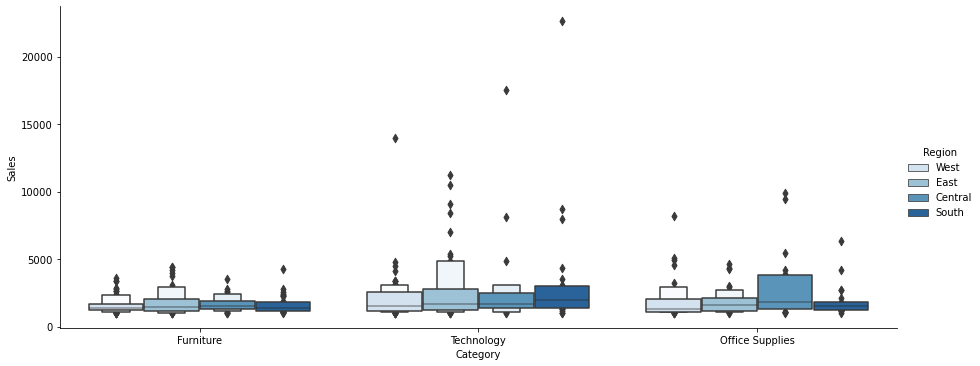

In [45]:
#1.....Which region has the most Net-Sales and Profit by Category ?
Data_sales = Data[Data["Sales"] > 1000]
sns.catplot(x='Category',y="Sales",hue="Region",data=Data_sales,kind="boxen",palette="Blues",
           height=5,aspect=2.5)

<AxesSubplot:xlabel='Category', ylabel='Profit'>

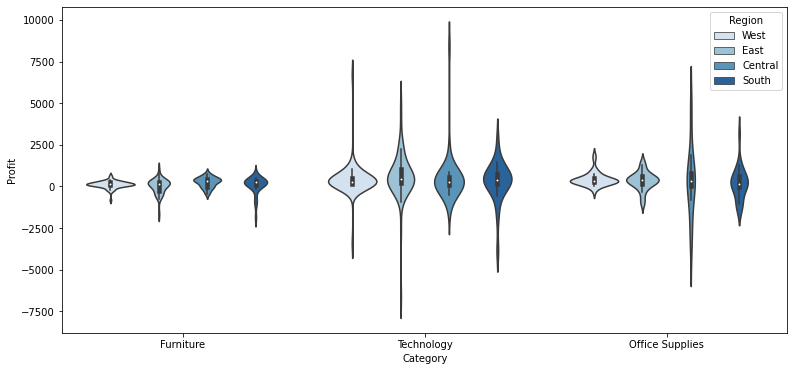

In [46]:
fig_1 = plt.subplots(figsize=(13,6))
Data_sales = Data[Data["Sales"] > 1000]
sns.violinplot(x='Category',y="Profit",hue="Region",data=Data_sales,kind="boxen",palette="Blues",
           height=5,aspect=2.5)
 

The Cat Plot graph depicts sales by region on the 3 category types that we have, although furniture sales 
are stable across all 4 regions its noticible that there are more sales of office supplies and Technology in the Central region 
Over from the above graphs sales of Furniture and Office supplies are a little lower in the Western and Eastern regions

ViolinPlot: Similar to the Catplot displays Profits against Categories, this view provides a broader view of the regions profits and losses

<AxesSubplot:title={'center':'Sub-categories Profits by segmentation'}, xlabel='Sub-Category', ylabel='Profit'>

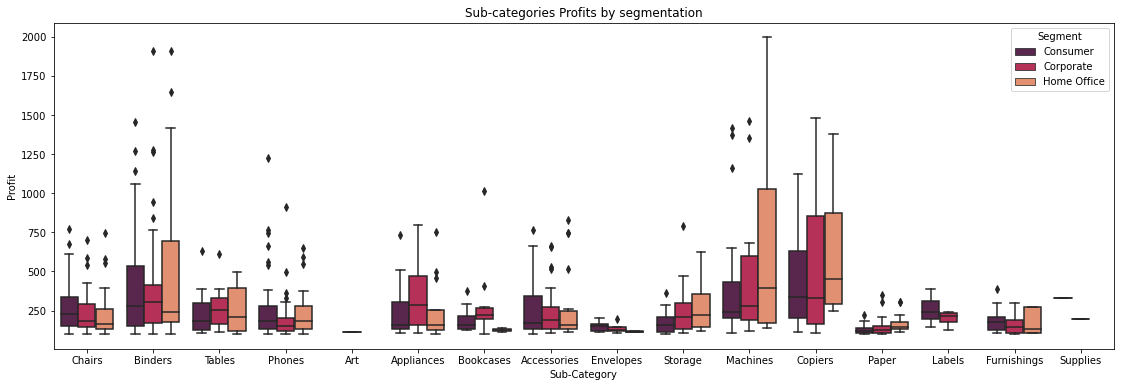

In [47]:
#2.....Which Segment of Customers bring in most profit by category of products
df_profit_1 = Data[Data["Profit"] > 100] 
df_profit_2 = df_profit_1[df_profit_1["Profit"] <= 2000]
fig_6 = plt.subplots(figsize=(19,6))
plt.title("Sub-categories Profits by segmentation")
sns.boxplot(x='Sub-Category',y="Profit",hue="Segment",data=df_profit_2,
           palette="rocket")


- Which Segment brings in the most profits by Sub-category? Home Office 
 Similar to the catplot above we can see a similar trend in what the different segmentation of our customers
 are buying. Home Office segment brings in more profit in our real world context it would be based on the need to match home office technomogy with office items 

- 100 is chosen becuase it is above the mean Sales. We are loonking at items with Profits above 100 and below 2000,
  

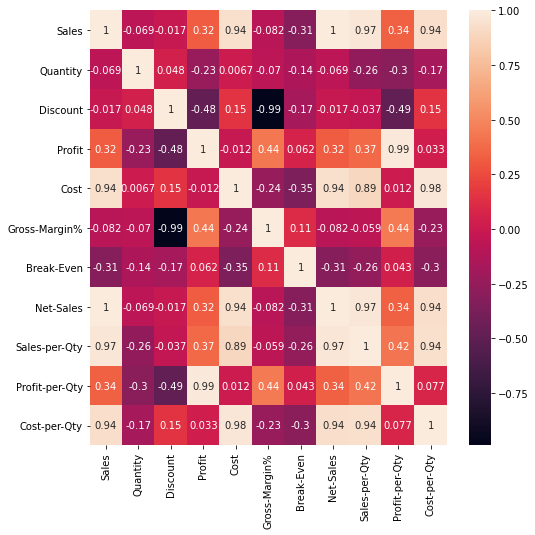

In [48]:
#3.....Correlation Matrix between numerical figures to see the correlation between discounts and quantities purchased/sales/profit
df_Corr = Data[['Sales','Quantity','Discount','Profit', 'Cost', 'Gross-Margin%', 'Break-Even', 'Net-Sales', 'Sales-per-Qty', 'Profit-per-Qty','Cost-per-Qty']].corr()
corrMatrix = df_Corr.corr()

fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(corrMatrix, annot=True)
plt.show()

Based on the Correlation Matrix above we can see that there is a negative relationship between discount and profits suggesting that discounts hurt profits

<AxesSubplot:xlabel='Profit', ylabel='Sub-Category'>

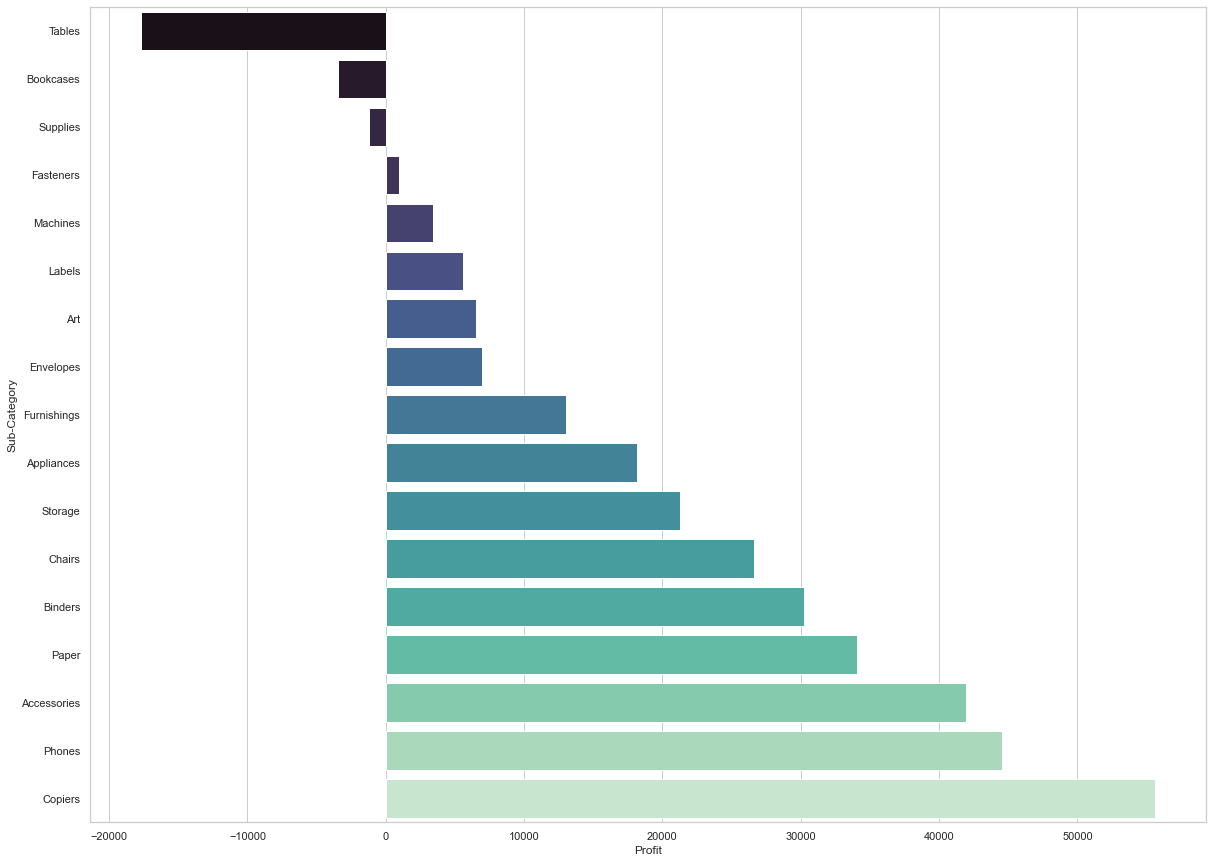

In [49]:
#4.....Profit & Loss by Item Category and or Sub-category?
sns.set(style="whitegrid")
p_source = df.groupby('Sub-Category').agg('sum')
p_source_sum = p_source.Profit.sort_values()
p_source_data = pd.DataFrame(p_source_sum).reset_index()
plt.figure(1, figsize=(20,15))
sns.barplot(x='Profit',y='Sub-Category', data=p_source_data, palette='mako')

From the above vertival Bar chart we can see that Copiers bring in the most Profit while items like Bookcase, Tables, and Supplies bring in the least amount of profit.

- Market Basket Analysis/ Association: To increase Profits from the above techniques such as pairing and bundeling can be used to match items that go toegther to increase consumer purchases. Ex Tables and Chairs, or Storage and Book Cases.



The below graph that displays Net-Sales by Category displays similair data there are more sales, Profits with the Tech items

In [50]:
#Net Sales by Item Category 
fig_h = px.area(Data["Net-Sales"], facet_col=Data["Category"])
fig_h.show()

In [51]:
#Most Profitable Regions 
fig = px.pie(Data, values='Profit', names='State')
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')

fig.show()

In [174]:
Data.to_csv('SuperStore_Data.csv', index=False)

In [175]:
df_sql = pd.read_csv("SuperStore_Data.csv")

# SQL analysis 

- integration of sql for top 10 citys ordered by maximum sales 

In [176]:
#Connect to sqlite3 
cnn = sqlite3.connect('SampleSuperstore.db')
df_sql.to_sql('Sunny', cnn)


/Users/Brpa_/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:2779: UserWarning:

The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.



In [177]:

#Load the sql module to ipython

%load_ext sql
%sql sqlite:///SampleSuperstore.db

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


View Top 10 Cities with highest Sales, As a Sales Manager the features of these cities would be important in Benchmarking to help the sales of regions with smaller sales, areas such as advertisement, shipping hubs, purchase predictability 

In [178]:

%%sql
 
Select max(Sales), City
From Sunny
Group by City
order by Sales DESC
Limit 10


 * sqlite:///SampleSuperstore.db
Done.


max(Sales),City
22638.48,Jacksonville
17499.95,Lafayette
13999.96,Seattle
11199.968,New York City
10499.97,Newark
9892.74,Detroit
9449.95,Minneapolis
9099.93,Lakewood
8749.95,Arlington
8399.976,Philadelphia


# Part 2 Time Series Predictions using Prophet
Steps
- Utilize Facebook Prophet to predict future Profits.

# Predicting Future Sales

In [ ]:
Pred_Data= Data.copy()
Pred_Data.head(1)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,...,Profit,Company Name,Date,Cost,Gross-Margin%,Break-Even,Net-Sales,Sales-per-Qty,Profit-per-Qty,Cost-per-Qty
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.96,...,41.9136,Rohan Inc,2018-06-27,220.0464,16.0,13.7529,261.96,130.98,20.9568,110.0232


In [ ]:
list(Pred_Data.columns)

['Ship Mode',
 'Segment',
 'Country',
 'City',
 'State',
 'Postal Code',
 'Region',
 'Category',
 'Sub-Category',
 'Sales',
 'Quantity',
 'Discount',
 'Profit',
 'Company Name',
 'Date',
 'Cost',
 'Gross-Margin%',
 'Break-Even',
 'Net-Sales',
 'Sales-per-Qty',
 'Profit-per-Qty',
 'Cost-per-Qty']

In [ ]:
Pred_Data.drop( ['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
                 'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 
                 'Discount', 'Company Name','Cost', 'Gross-Margin%',
                 'Break-Even', 'Net-Sales', 'Sales-per-Qty', 'Profit-per-Qty', 'Cost-per-Qty'], axis=1, inplace=True)


In [ ]:
Pred_Data.columns = ['y', 'ds']

In [ ]:
Pred_Data.head()

,y,ds
0,41.9136,2018-06-27
1,219.5820,2019-04-08
2,6.8714,2019-05-14
3,-383.0310,2019-03-06
4,2.5164,2019-08-27


In [ ]:
m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(Pred_Data)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [ ]:
future = m.make_future_dataframe(periods=180, freq='D')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,19.196930,-428.260571,463.867656,19.196930,19.196930,9.692062,9.692062,9.692062,10.616874,10.616874,10.616874,-0.924813,-0.924813,-0.924813,0.0,0.0,0.0,28.888992
1,2018-01-02,19.081268,-445.602601,468.057636,19.081268,19.081268,8.187436,8.187436,8.187436,10.616874,10.616874,10.616874,-2.429438,-2.429438,-2.429438,0.0,0.0,0.0,27.268704
2,2018-01-03,18.965606,-402.774904,479.488302,18.965606,18.965606,14.932670,14.932670,14.932670,10.616874,10.616874,10.616874,4.315795,4.315795,4.315795,0.0,0.0,0.0,33.898275
3,2018-01-04,18.849944,-404.321237,497.582994,18.849944,18.849944,19.322167,19.322167,19.322167,10.616874,10.616874,10.616874,8.705293,8.705293,8.705293,0.0,0.0,0.0,38.172111
4,2018-01-05,18.734282,-427.445164,501.927918,18.734282,18.734282,6.383909,6.383909,6.383909,10.616874,10.616874,10.616874,-4.232965,-4.232965,-4.232965,0.0,0.0,0.0,25.118191


In [ ]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
847,2020-06-21,24.776180,-403.542290,482.991105,-13.266621,65.033796,9.014477,9.014477,9.014477,10.616874,10.616874,10.616874,-1.602397,-1.602397,-1.602397,0.0,0.0,0.0,33.790657
848,2020-06-22,24.791105,-423.068352,508.836329,-13.623130,65.327257,9.692062,9.692062,9.692062,10.616874,10.616874,10.616874,-0.924813,-0.924813,-0.924813,0.0,0.0,0.0,34.483167
849,2020-06-23,24.806031,-429.782791,484.162793,-13.979065,65.621581,8.187436,8.187436,8.187436,10.616874,10.616874,10.616874,-2.429438,-2.429438,-2.429438,0.0,0.0,0.0,32.993467
850,2020-06-24,24.820956,-417.127504,484.417340,-14.334354,65.916673,14.932670,14.932670,14.932670,10.616874,10.616874,10.616874,4.315795,4.315795,4.315795,0.0,0.0,0.0,39.753626
851,2020-06-25,24.835881,-395.728326,500.566196,-14.689644,66.273679,19.322167,19.322167,19.322167,10.616874,10.616874,10.616874,8.705293,8.705293,8.705293,0.0,0.0,0.0,44.158049


In [ ]:
forecast[['ds', 'yhat']]

,ds,yhat
0,2018-01-01,28.888992
1,2018-01-02,27.268704
2,2018-01-03,33.898275
3,2018-01-04,38.172111
4,2018-01-05,25.118191
...,...,...
847,2020-06-21,33.790657
848,2020-06-22,34.483167
849,2020-06-23,32.993467
850,2020-06-24,39.753626


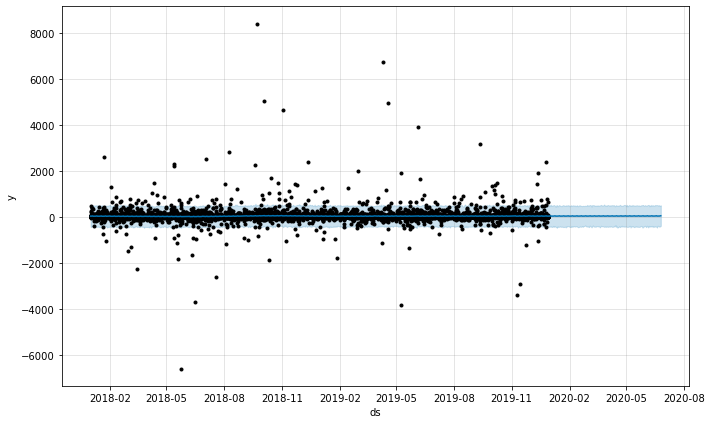

In [ ]:
plot1 = m.plot(forecast)

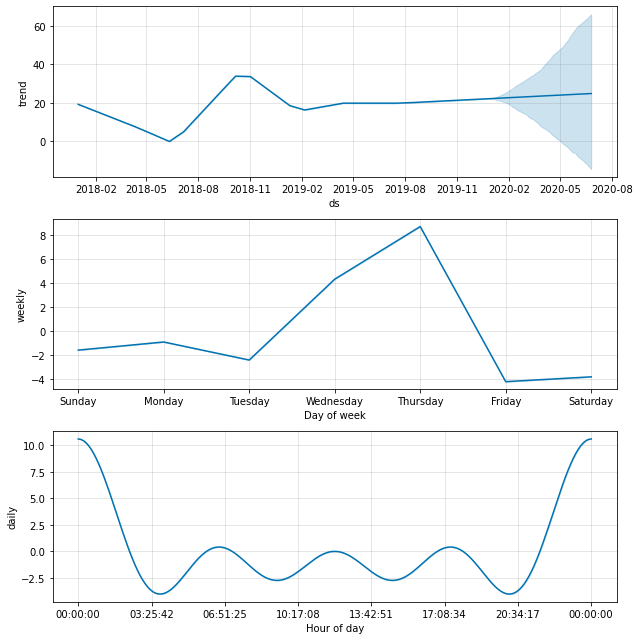

In [ ]:
plot2 = m.plot_components(forecast)

THe Graph's above correlate with our data and the min/,ax in the trends that they predict. 

- Trend: Accurate within the means of existing data of Profits between -$20 up to $60 in the following months 
- Weekly Sales trend: Prophet did well prediciting with randomized data as real life data would suggest the peaks in orders from different parts of the week and a dip suggesting users activity fluctuations. The potential to boost ads Marketing around such times


As a business manager the above Exploratory Data would be hep in starting the conversation in learning 
- High Sales and Profitablity areas to benchmark 
- Products most frequentyl purchased to apply bundling and probably item reccomendation 
- Prediciting User Purchases. This is most helpful with Supply chain knowing how many items to hold at a certain hub to retain a needed quantities of products to decrease supplies on hand, which helps reduce the budget.

Strength: Sales informaton by Location allows us to forecast high growth and low growth areas allow opportunity to learn from high growth areas such as California and improve metrics in other cities

Weakness: The data did not original include date series, this would be beneficial to display trends in data such as effects of online eCommerce due to Covid-19

Opportunities: Richer data modeling with integration of adding a data table of consumer informtion to know where customers are buying from to monitor spend habits.

Threats: How to maintain low sales areas, as suggested in the opportunties with inclusion of consumer data, data security would be of concern to dertmine if transaction is that of a customer or phishing

# The End 

